In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(palette='pastel')

In [2]:
df = pd.read_pickle('pre_commit_df.pkl')
df['total_hooks'] = df['local_hooks'] + df['remote_hooks']

In [3]:
df = df[df['is_valid']]

In [4]:
df.head()

,default_install_hook_types_count,default_language_version_count,default_stages_count,exclude_count,fail_fast_count,files_count,minimum_pre_commit_version_count,repos_count,local_hooks,local_hooks_raw,remote_repoes,remote_hooks,remote_hooks_raw,is_valid,raw_yaml,total_hooks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[],[],[https://github.com/ambv/black],[black],"[{'id': 'black', 'language_version': 'python'}]",True,{'repos': [{'repo': 'https://github.com/ambv/b...,[black]
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,[],[],[https://github.com/ambv/black],[black],[{'id': 'black'}],True,{'default_language_version': {'python': 'pytho...,[black]
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[],[],[https://github.com/commitizen-tools/commitizen],[commitizen],"[{'id': 'commitizen', 'stages': ['commit-msg']}]",True,"{'repos': [{'hooks': [{'id': 'commitizen', 'st...",[commitizen]
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[],[],[https://github.com/pre-commit/pre-commit-hooks],[trailing-whitespace],[{'id': 'trailing-whitespace'}],True,{'repos': [{'repo': 'https://github.com/pre-co...,[trailing-whitespace]
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,[],[],[https://github.com/andreswebs/pre-commit-hooks],[tf-module-docs],[{'id': 'tf-module-docs'}],True,{'repos': [{'repo': 'https://github.com/andres...,[tf-module-docs]


# Goal 
To investigate how hooks are used. Topics to investigate:
 * how many remote repoes used
 * how many local hooks used
 * how many remote hooks used
 * how many total hooks used
 * which hooks are used alot?
 * what type of hooks are used?

## How many remote repoes used?
23018 remote repoes used across all projects. On average, 2.485 (about 2 - 3) remote repoes per project. Mode of 1.

### Also, what remote repoes are used the most?
576 unique remote repoes. Top 10 remote repoes represent more than 50% of all unique remote repoes. The top repo was the pre-commit repo. Among the top repoes are popular linters and formatters like black, isort, flake8. Some people chose to mirrors of these repoes hosted by pre-commit themselves. Of note, there was 1 Terraform related repoe in the top 20 (https://github.com/antonbabenko/pre-commit-terraform).

In [5]:
df['remote_repoes'].apply(len).describe()

count    9261.000000
mean        2.485477
std         1.660014
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        14.000000
Name: remote_repoes, dtype: float64

<Axes: xlabel='remote_repoes', ylabel='Count'>

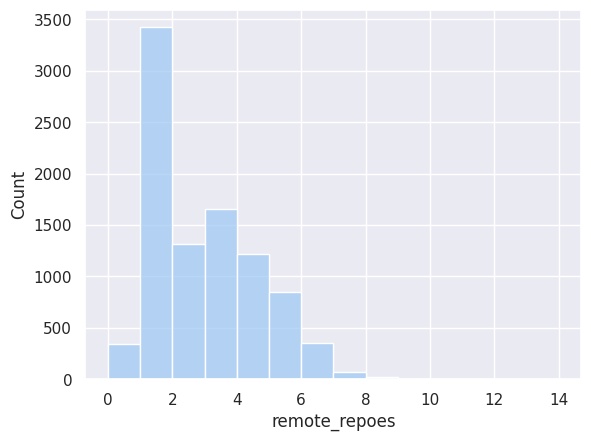

In [6]:
sns.histplot(df['remote_repoes'].apply(len), bins=14)

In [7]:
repoes = []
def repoes_add(l, repoes):
    repoes.extend(l)
df['remote_repoes'].apply(repoes_add, repoes = repoes)
repoe_series = pd.Series(repoes)

In [8]:
repoe_series.value_counts().describe()

count     576.000000
mean       39.960069
std       274.633619
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      5396.000000
dtype: float64

In [9]:
repoe_series.shape

(23018,)

In [10]:
repoe_series.value_counts().head(10).sum()

14473

In [11]:
repoe_series.value_counts()

https://github.com/pre-commit/pre-commit-hooks               5396
https://github.com/psf/black                                 3018
https://github.com/ambv/black                                1130
https://gitlab.com/pycqa/flake8                               954
https://github.com/pycqa/isort                                890
                                                             ... 
https://github.com/SamStudio8/pre-commit-assert-changelog       1
https://github.com/horta/sanitize-pyproject-version             1
https://github.com/golangci/golangci-lint.git                   1
https://github.com/asottile/reorder-python-imports              1
https://github.com/DanielNoord/pydocstringformatter             1
Length: 576, dtype: int64

In [12]:
repoe_series.value_counts().head(20)

https://github.com/pre-commit/pre-commit-hooks          5396
https://github.com/psf/black                            3018
https://github.com/ambv/black                           1130
https://gitlab.com/pycqa/flake8                          954
https://github.com/pycqa/isort                           890
https://github.com/PyCQA/flake8                          727
https://github.com/PyCQA/isort                           630
https://github.com/pre-commit/mirrors-mypy               612
https://github.com/pycqa/flake8                          568
https://github.com/asottile/pyupgrade                    548
https://github.com/timothycrosley/isort                  425
https://github.com/pre-commit/mirrors-prettier           342
https://github.com/pre-commit/mirrors-isort              318
https://github.com/antonbabenko/pre-commit-terraform     302
https://github.com/commitizen-tools/commitizen           252
https://github.com/Lucas-C/pre-commit-hooks              229
https://github.com/asott

/tmp/ipykernel_7113/3158815981.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'cat' : 'other', 'freq' : others}, ignore_index = True)


<Axes: xlabel='freq', ylabel='cat'>

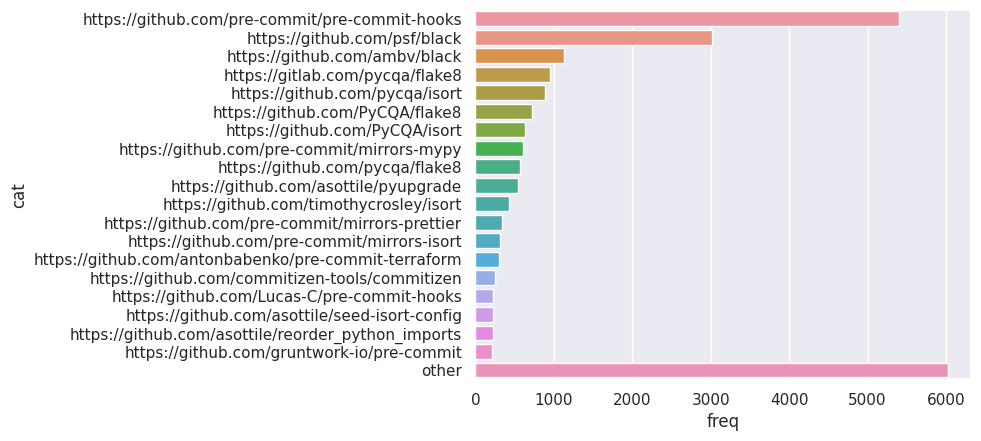

In [13]:
other_cutoff = 200

tmp_df = repoe_series.value_counts()
tmp_df = tmp_df.reset_index()
tmp_df.columns = ['cat', 'freq']
others = tmp_df[tmp_df['freq'] <= other_cutoff]['freq'].sum()
tmp_df = tmp_df[tmp_df['freq'] > other_cutoff]
tmp_df = tmp_df.append({'cat' : 'other', 'freq' : others}, ignore_index = True)
sns.barplot(y = 'cat', x = 'freq', data = tmp_df, orient = 'h')

## How many local hooks are used?
Most projects do not use local hooks (86.5% - 8015). The first couple most popular local hooks can be done using a remote repoe/hook. This trends end at pytest. Local calls allow for flexbility as the entry point of the hook allows for any bash command to be run on the local machine. For example, we see the 'system' id used when a CLI command no associated with a common package is used (like calling poetry). This flexibility also means hook ids are purely used for semantic purposes, unlike remote hooks.

In [14]:
df['local_hooks'].apply(len).describe()

count    9261.000000
mean        0.260879
std         0.813209
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.000000
Name: local_hooks, dtype: float64

In [15]:
pd.Series(df['local_hooks'].apply(len) == 0).sum()

8015

In [16]:
pd.Series(df['local_hooks'].apply(len) == 0).sum()/df.shape[0]

0.8654572940287226

<Axes: xlabel='local_hooks', ylabel='Count'>

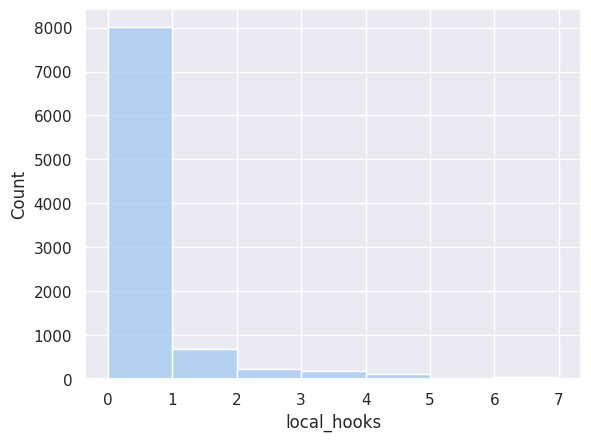

In [17]:
sns.histplot(df['local_hooks'].apply(len), bins = 7)

In [18]:
hooks = []
def hooks_add(l, hooks):
    hooks.extend(l)
df['local_hooks'].apply(hooks_add, hooks = hooks)
hooks_series = pd.Series(hooks)

In [19]:
hooks_series.value_counts().describe()

count    370.000000
mean       6.529730
std       28.162141
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      307.000000
dtype: float64

In [20]:
hooks_series.value_counts()

black                307
flake8               303
isort                211
pylint               171
mypy                 142
                    ... 
regenerate-readme      1
info                   1
go-fmt                 1
format-isort           1
nbstripout             1
Length: 370, dtype: int64

In [21]:
hooks_series.value_counts().sum()

2416

/tmp/ipykernel_7113/3177907082.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'cat' : 'other', 'freq' : others}, ignore_index = True)


<Axes: xlabel='freq', ylabel='cat'>

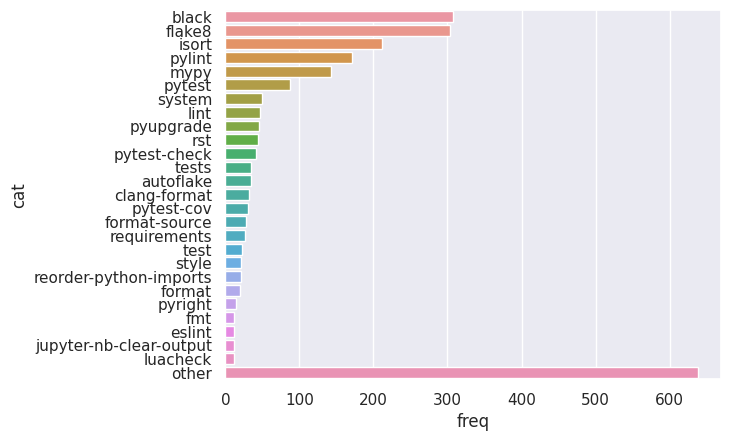

In [22]:
other_cutoff = 10

tmp_df = hooks_series.value_counts()
tmp_df = tmp_df.reset_index()
tmp_df.columns = ['cat', 'freq']
others = tmp_df[tmp_df['freq'] <= other_cutoff]['freq'].sum()
tmp_df = tmp_df[tmp_df['freq'] > other_cutoff]
tmp_df = tmp_df.append({'cat' : 'other', 'freq' : others}, ignore_index = True)
sns.barplot(y = 'cat', x = 'freq', data = tmp_df, orient = 'h')

## How many remote hooks are used?
A lot more remote hooks are used than local hooks, with an avg of 5.03 hooks per project. The mode for projects is to use 1 hook. Again, most projects use a small subset of hooks. There are a total of 642 unique different hooks used for a total of 46660 hooks used. The top 34 hooks represent 81.1% of all hooks used. '

Of the top 10 hooks, 7 are from pre-commit themselves

* trailing-whitespace (yes)
* end-of-file-fixer (yes)
* black                              
* check-yaml (yes)
* flake8                             
* isort                             
* check-added-large-files (yes)
* check-merge-conflict (yes)
* mixed-line-ending  (yes)
* check-json  (yes)


In [23]:
df['remote_hooks'].apply(len).describe()

count    9261.000000
mean        5.038333
std         4.037451
min         0.000000
25%         1.000000
50%         4.000000
75%         7.000000
max        24.000000
Name: remote_hooks, dtype: float64

<Axes: xlabel='remote_hooks', ylabel='Count'>

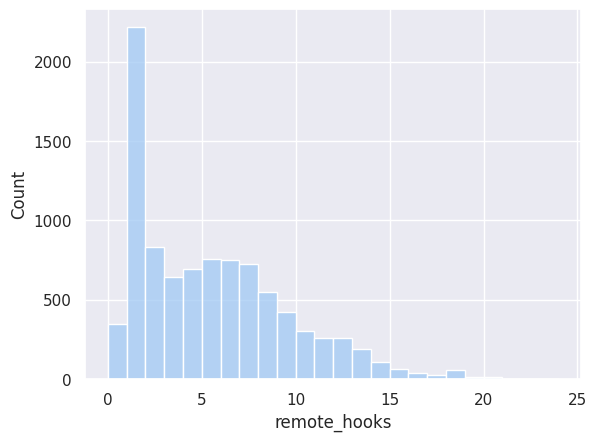

In [24]:
sns.histplot(df['remote_hooks'].apply(len), bins=24)

In [25]:
hooks = []
def hooks_add(l, hooks):
    hooks.extend(l)
df['remote_hooks'].apply(hooks_add, hooks = hooks)
hooks_series = pd.Series(hooks)

In [26]:
hooks_series.value_counts().describe()

count     642.000000
mean       72.679128
std       393.510180
min         1.000000
25%         1.000000
50%         3.000000
75%        12.000000
max      4874.000000
dtype: float64

In [27]:
hooks_series.value_counts().sum()

46660

In [28]:
hooks_series.value_counts().head(34).sum()

37843

In [29]:
hooks_series.value_counts().head(34).sum()/hooks_series.value_counts().sum()

0.8110372910415774

In [30]:
hooks_series.value_counts().head(34)

trailing-whitespace                4874
end-of-file-fixer                  4572
black                              4355
check-yaml                         3401
flake8                             2746
isort                              2342
check-added-large-files            2006
check-merge-conflict               1731
mixed-line-ending                   969
check-json                          950
debug-statements                    850
detect-private-key                  676
mypy                                629
check-toml                          621
check-case-conflict                 600
check-ast                           586
pyupgrade                           548
requirements-txt-fixer              544
check-symlinks                      475
terraform_fmt                       468
prettier                            417
check-executables-have-shebangs     390
no-commit-to-branch                 346
terraform_docs                      336
check-docstring-first               320


/tmp/ipykernel_7113/2292455067.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append({'cat' : 'other', 'freq' : others}, ignore_index = True)


<Axes: xlabel='freq', ylabel='cat'>

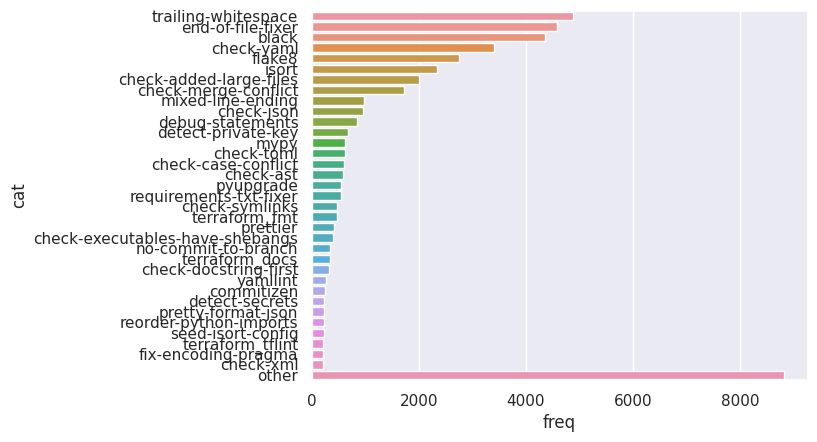

In [31]:
other_cutoff = 200

tmp_df = hooks_series.value_counts()
tmp_df = tmp_df.reset_index()
tmp_df.columns = ['cat', 'freq']
others = tmp_df[tmp_df['freq'] <= other_cutoff]['freq'].sum()
tmp_df = tmp_df[tmp_df['freq'] > other_cutoff]
tmp_df = tmp_df.append({'cat' : 'other', 'freq' : others}, ignore_index = True)
sns.barplot(y = 'cat', x = 'freq', data = tmp_df, orient = 'h')

## What type of hooks are used?

Most hooks were identified as formtters. The tottal number of hooks reflect this, with formatting hooks representing more than half of all hooks used.

In [32]:
hook_type_mapper = {'sungho-cho': 'unknown',
 'flutter-precommit': 'formatter',
 'clang-format': 'formatter',
 'pydocstyle': 'documentation',
 'sic': 'unknown',
 'oxipng': 'formatter',
 'dotnet-format': 'formatter',
 'check-merge-conflict': 'validation',
 'format_all': 'formatter',
 'vimdoc': 'documentation',
 'terraform_validate': 'validation',
 'shellcheck': 'linter',
 'go-build': 'builder',
 'stylua-system': 'formatter',
 'tartufo': 'security',
 'check-github-workflows': 'validation',
 'pylint': 'linter',
 'pyproject-fmt': 'formatter',
 'no-commit-to-branch': 'validation',
 'style': 'unknown',
 'nbdev_clean': 'formatter',
 'nbdev_export': 'build',
 'flutter-import-sorter': 'formatter',
 'formatting_md_to_html': 'unknown',
 'git-secrets': 'security',
 'standard': 'linter',
 'markdownlint-cli2': 'linter',
 'check-yaml': 'validation',
 'helm-docs': 'documentation',
 'nbstripout': 'formatter',
 'rpmlint': 'linter',
 'black': 'formatter',
 'commitizen': 'commit message',
 'trailing-whitespace': 'formatter',
 'tf-module-docs': 'documentation',
 'tox': 'testing',
 'end-of-file-fixer': 'formatter',
 'terraform-fmt': 'formatter',
 'detect-secrets': 'security',
 'autopep8': 'formatter',
 'poetry-check': 'validation',
 'poetry-lock': 'validation',
 'yamllint': 'linter',
 'prettier': 'formatter',
 'ansible-lint': 'linter',
 'docker-lint': 'linter',
 'markdown-toc': 'documentation',
 'golangci-lint': 'linter',
 'go-fmt': 'formatter',
 'go-mod-tidy': 'validation',
 'terraform_fmt': 'formatter',
 'terraform_docs': 'documentation',
 'nbqa-isort': 'formatter',
 'nbqa-black': 'formatter',
 'nbqa-flake8': 'linter',
 'go-unit-tests': 'testing',
 'typos': 'formatter',
 'build-wasm': 'unknown',
 'gitleaks': 'security',
 'goimports': 'linter',
 'check-added-large-files': 'validation',
 'detect-private-key': 'security',
 'cmake-format': 'formatter',
 'gofmt': 'formatter',
 'incr_version': 'documentation',
 'fmt': 'formatter',
 'cargo-check': 'linter',
 'clippy': 'linter',
 'flake8': 'formatter',
 'commitizen-branch': 'commit message',
 'isort': 'formatter',
 'mixed-line-ending': 'formatter',
 'check-json': 'validator',
 'debug-statements': 'formatter',
 'mypy': 'linter',
 'check-toml': 'validation',
 'check-case-conflict': 'validation',
 'pyupgrade': 'documentation',
 'check-ast': 'validation',
 'requirements-txt-fixer': 'formatter',
 'check-symlinks': 'validation',
 'check-executables-have-shebangs': 'validation',
 'check-docstring-first': 'validation',
 'reorder-python-imports': 'formatter',
 'pretty-format-json': 'formatter',
 'seed-isort-config': 'formatter',
 'terraform_tflint': 'linter',
 'fix-encoding-pragma': 'formatter',
 'check-xml': 'validation',
 'double-quote-string-fixer': 'formatter',
 'autoflake': 'formatter',
 'fix-byte-order-marker': 'formatter',
 'remove-tabs': 'formatter',
 'remove-crlf': 'formatter',
 'detect-aws-credentials': 'security',
 'yapf': 'formatter',
 'markdownlint': 'linter',
 'check-byte-order-marker': 'validation',
 'ruff': 'linter',
 'check-shebang-scripts-are-executable': 'validation',
 'terraform-docs-system': 'documentation',
 'terraform_tfsec': 'security',
 'docformatter': 'formatter',
 'codespell': 'validation',
 'name-tests-test': 'validation',
 'bandit': 'security',
 'go-imports': 'unknown',
 'blacken-docs': 'documentation',
 'forbid-crlf': 'validation',
 'pytest': 'testing',
 'check-builtin-literals': 'validation',
 'forbid-tabs': 'validation',
 'python-check-blanket-noqa': 'validation',
 'terraform-validate': 'validation',
 'commitlint': 'linter',
 'forbid-new-submodules': 'validation',
 'yamlfmt': 'formatter',
 'eslint': 'linter',
 'update-docs': 'documentation',
 'add-trailing-comma': 'formatter',
 'tflint': 'linter',
 'lint': 'linter',
 'shfmt': 'formatter',
 'shell-lint': 'linter',
 'check-vcs-permalinks': 'validation',
 'destroyed-symlinks': 'validation',
 'forbid-secrets': 'security',
 'mdformat': 'formatter',
 'system': 'unknown',
 'fix-smartquotes': 'formatter',
 'gitlint': 'linter',
 'rst': 'linter',
 'black-jupyter': 'formatter',
 'pytest-check': 'testing',
 'pycln': 'formatter',
 'checkov': 'validation',
 'go-vet': 'linter',
 'interrogate': 'validation',
 'ansible_role_find_unused_variable': 'validation',
 'ansible_role_find_empty_files': 'validation',
 'ansible_role_find_empty_directories': 'validation',
 'setup-cfg-fmt': 'formatter',
 'sort-simple-yaml': 'formatter',
 'check-useless-excludes': 'meta',
 'reuse': 'validation',
 'tests': 'testing',
 'go-lint': 'linter',
 'check-hooks-apply': 'meta',
 'python-safety-dependencies-check': 'security',
 'python-use-type-annotations': 'validation',
 'pytest-cov': 'testing',
 'format-source': 'formatter',
 'terraform_checkov': 'linter',
 'package-app-dependencies': 'validation',
 'requirements': 'unknown',
 'org-hook': 'unknown',
 'forbid-binary': 'validation',
 'pyright': 'validation',
 'test': 'testing',
 'git-check': 'validation',
 'secret-scanner': 'security',
 'ansible_role_fix_readability': 'validation',
 'poetry-export': 'unknown ',
 'helmlint': 'linter',
 'pretty-format-yaml': 'formatter',
 'cpplint': 'linter',
 'conventional-pre-commit': 'commit message',
 'doctoc': 'formatter',
 'format': 'formatter',
 'rst-backticks': 'validation',
 'no-go-testing': 'validation',
 'stylua': 'formatter',
 'cfn-python-lint': 'linter',
 'file-contents-sorter': 'formatter',
 'nixpkgs-fmt': 'formatter',
 'ansible_role_find_undefined_handlers': 'validation',
 'hadolint': 'linter',
 'hadolint-docker': 'linter',
 'doc8': 'linter',
 'check-manifest': 'validation',
 'pip-compile': 'validation',
 'flynt': 'unknown',
 'python-bandit-vulnerability-check': 'security',
 'luacheck': 'validation',
 'yesqa': 'formatter',
 'validate_manifest': 'validation',
 'php-lint': 'linter',
 'terraform-docs-go': 'documentation',
 'markdown-link-check': 'validation',
 'cppcheck': 'validation',
 'ansible_role_find_unquoted_values': 'validation',
 'swiftformat': 'formatter',
 'pyroma': 'linter',
 'check-github-actions': 'validation',
 'pretty-format-java': 'formatter',
 'script-must-have-extension': 'validation',
 'go-cyclo': 'unknown',
 'parsable-R': 'validation',
 'validate-toml': 'validation',
 'prospector': 'linter',
 'editorconfig-checker': 'validation',
 'nbqa-pyupgrade': 'documentation',
 'terraform-vars': 'linter',
 'jupyter-nb-clear-output': 'formatter',
 'yaq-traits-compose': 'documentation',
 'yaq-traits-check': 'validation',
 'helm-docs-built': 'documentation',
 'dockerfilelint': 'linter',
 'beautysh': 'formatter',
 'ansible_role_find_horizontal_when': 'validation',
 'rstcheck': 'validation',
 'ggshield': 'security',
 'vint': 'linter',
 'go-critic': 'unknown',
 'talisman-commit': 'security',
 'clang-tidy': 'formatter'}

In [33]:
types = []
for _, hook_type in hook_type_mapper.items():
    types.append(hook_type)
set(types)

{'build',
 'builder',
 'commit message',
 'documentation',
 'formatter',
 'linter',
 'meta',
 'security',
 'testing',
 'unknown',
 'unknown ',
 'validation',
 'validator'}

In [34]:
clean_hook_type_mapper = {}

for hook_name, hook_type in hook_type_mapper.items():
    if hook_type == 'validator':
        hook_type = 'validation'
    if hook_type == 'unknown ':
        hook_type = 'unknown'
    if hook_type == 'build':
        hook_type = 'builder'
    clean_hook_type_mapper[hook_name] = hook_type

In [35]:
types = []
for _, hook_type in clean_hook_type_mapper.items():
    types.append(hook_type)
set(types)

{'builder',
 'commit message',
 'documentation',
 'formatter',
 'linter',
 'meta',
 'security',
 'testing',
 'unknown',
 'validation'}

In [36]:
hook_type_series = pd.Series(clean_hook_type_mapper.values())

In [37]:
hook_type_series.value_counts()

formatter         62
validation        59
linter            39
documentation     15
security          14
unknown           13
testing            7
commit message     3
builder            2
meta               2
dtype: int64

<Axes: xlabel='freq', ylabel='cat'>

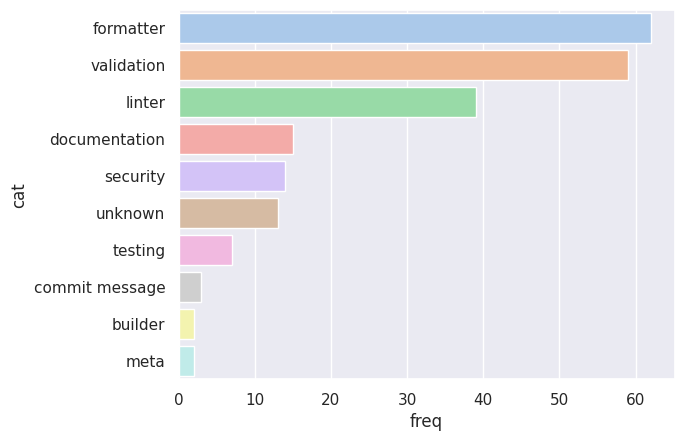

In [38]:
tmp_df = hook_type_series.value_counts()
tmp_df = tmp_df.reset_index()
tmp_df.columns = ['cat', 'freq']
sns.barplot(y = 'cat', x = 'freq', data = tmp_df, orient = 'h')

In [52]:
def get_hook_type(hook_name):
    tmp = clean_hook_type_mapper[hook_name] if hook_name in clean_hook_type_mapper else 'unknown'
    return clean_hook_type_mapper[hook_name] if hook_name in clean_hook_type_mapper else 'unknown'

def get_hook_type_list(hook_names):
    return [get_hook_type(hook_name) for hook_name in hook_names]

df['hooks_types']  = df['total_hooks'].apply(get_hook_type_list)

In [54]:
hook_types = [hook_type for hooks_type_list in df['hooks_types'].tolist() for hook_type in hooks_type_list]
hook_type_series = pd.Series(hook_types)

In [57]:
hook_type_series.value_counts()

formatter         26754
validation        13615
linter             3244
unknown            1859
security           1524
documentation      1391
commit message      293
testing             265
meta                 67
builder              64
dtype: int64

In [60]:
26754/hook_type_series.value_counts().sum()

0.5451544543157552

<Axes: xlabel='freq', ylabel='cat'>

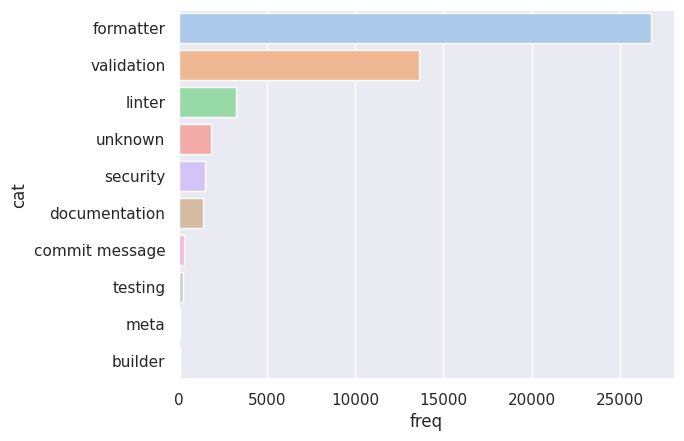

In [56]:
tmp_df = hook_type_series.value_counts()
tmp_df = tmp_df.reset_index()
tmp_df.columns = ['cat', 'freq']
sns.barplot(y = 'cat', x = 'freq', data = tmp_df, orient = 'h')

In [44]:
hooks_series.value_counts()

formatter         26754
validation        12665
linter             3244
unknown            1837
security           1524
documentation      1391
validator           950
commit message      293
testing             265
meta                 67
builder              37
build                27
unknown              22
dtype: int64

In [45]:
hooks_series.value_counts().index

Index(['formatter', 'validation', 'linter', 'unknown', 'security',
       'documentation', 'validator', 'commit message', 'testing', 'meta',
       'builder', 'build', 'unknown '],
      dtype='object')